In [1]:
from function import LogisticRegression
from optimization import SGDo, LISGD
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X, y = load_breast_cancer(True)
dataset = list(zip(X, y)) # the format the functions want

In [3]:
reg_coef = 1
myLR = LogisticRegression(reg_coef)

In [4]:
D = 10 # Diameter of the constraint set. We assume for simplicity that our constraint set is ||x||_2 <= D/2
G = 1000 # Lipschitz constant 
L = 1/3 + reg_coef # Smoothness parameter ||grad_f(x) - grad_f(y)|| <= L||x-y||
K = 5 # Number of passes over the entire dataset we want to optimize for
n = len(dataset) # Number of datapoints in the data set
l = 2 # some extra parameter for the strongly convex cases (used in Theorem 1 and 2)
Mu= reg_coef # Strong convexity parameter
sc= True #True if we want to use the Strongly Convex version of the algorithm (Theorem 1 and 2), False for the general smooth convex function (Theorem 3)
Large_K = False #when sc is True, this decides if we fo

In [5]:
mySGDo = SGDo(D, G, L, K, n, l, Mu, sc, Large_K)

In [6]:
last_iter_x, avg_x, tail_x, loss = mySGDo.run(myLR, dataset, np.random.randn(30))

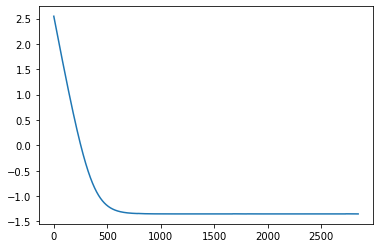

In [7]:
plt.plot(np.log(loss))

In [8]:
np.mean([myLR.f(avg_x, d) for d in dataset])

0.30868203450230053

## Last Iteration SGD

In [16]:
C = 1
T = 200
myLISGD = LISGD(G, D, Mu, C, T, n, sc)

In [17]:
last_iter_x, avg_x, loss= myLISGD.run(myLR, dataset, np.random.randn(30))

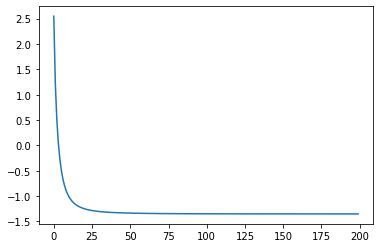

In [18]:
plt.plot(np.log(loss))